Car Price Prediction

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import linear_model 

Pandas is used to analyze data.

Matplotlib is an amazing visualization library in Python for 2D plots of arrays



Data importing

In [2]:
car_dataset = pd.read_csv('car_data.csv')
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_dataset.shape

(301, 9)

Data Processing

In [4]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

We are replacing the Car's manufacturing year with It's age to better understand the dataset

In [7]:
car_dataset['Current_Year'] = 2021

In [8]:
car_dataset['Age'] = car_dataset['Current_Year']-car_dataset['Year']

Dataser Post Processing

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,2021,7
1,sx4,2013,4.75,9.54,43000,1,0,0,0,2021,8
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,2021,4
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,2021,10
4,swift,2014,4.60,6.87,42450,1,0,0,0,2021,7


Target split

Our Goal is to predict the value of car, Hence we are selecting it as the target.

Car name, Selling Price, year and Current year are dropped in the Selecting of our Independent variable X as these do not serve a purpose in traing the model.

Axis 1 is used to specify drop of a column

In [10]:
X = car_dataset.drop(['Car_Name','Selling_Price','Year','Current_Year'],axis=1)
Y = car_dataset['Selling_Price']

In [11]:
print(X)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0             5.59       27000          0            0             0      0   
1             9.54       43000          1            0             0      0   
2             9.85        6900          0            0             0      0   
3             4.15        5200          0            0             0      0   
4             6.87       42450          1            0             0      0   
..             ...         ...        ...          ...           ...    ...   
296          11.60       33988          1            0             0      0   
297           5.90       60000          0            0             0      0   
298          11.00       87934          0            0             0      0   
299          12.50        9000          1            0             0      0   
300           5.90        5464          0            0             0      0   

     Age  
0      7  
1      8  
2      4  
3     1

In [12]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Test Train split


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(270, 7) (270,)
(31, 7) (31,)


**1) Linear Regression**


In [14]:
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Testing our model on Test dataset

In [16]:
Y_pred = lin_reg_model.predict(X_test)

MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual.

In [17]:
MSE = metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Square Error: ", MSE)


Mean Square Error:  2.150129918986354


R- Squared quantifies how well a linear regression model fits a dataset.

R- Squared tells how well the predictor variables can explain the variation in the response variable.


In [18]:
# R squared 
r_square = metrics.r2_score(Y_test, Y_pred)
print("R squared : ", r_square*100)

R squared :  83.65766715024981


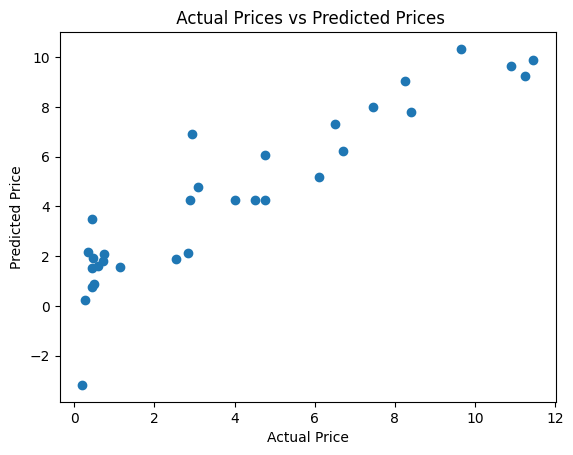

In [19]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Validation Data
Testing our model on training data

In [20]:
Y_pred_vald = lin_reg_model.predict(X_train)

In [21]:
MSE = metrics.mean_squared_error(Y_train, Y_pred_vald)
print("Mean Square Error : ", MSE)

Mean Square Error :  3.2590308233090983


In [22]:
# R squared 
r_square = metrics.r2_score(Y_train, Y_pred_vald)
print("R squared : ", r_square*100)

R squared :  87.99451660493706


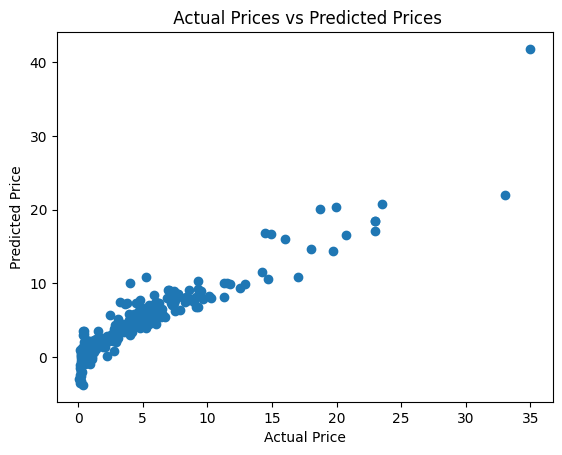

In [23]:
plt.scatter(Y_train, Y_pred_vald)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2) Lasso Regression

In [24]:
# loading the linear regression model
lass_reg_model = Lasso()

In [25]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [26]:
# prediction on Testing data
Y_pred = lass_reg_model.predict(X_test)

In [27]:
# R squared 
r_square = metrics.r2_score(Y_test, Y_pred)
print("R squared : ", r_square*100)

R squared :  87.09151424834702


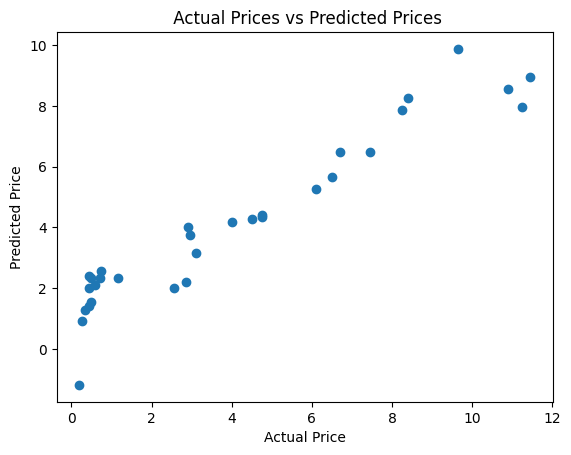

In [28]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Validation Data Testing our model on training data

In [29]:
Y_pred_vald = lass_reg_model.predict(X_train)

In [30]:
MSE = metrics.mean_squared_error(Y_train, Y_pred_vald)
print("Mean Square Error : ", MSE)

Mean Square Error :  4.267744536337575


In [31]:
# R squared 
r_square = metrics.r2_score(Y_train, Y_pred_vald)
print("R squared : ", r_square*100)

R squared :  84.27865861257861


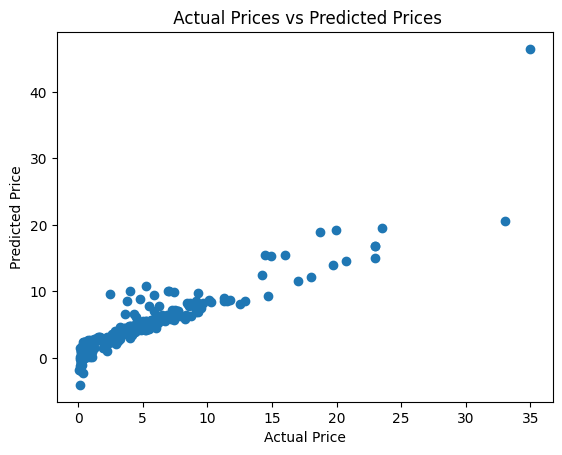

In [32]:
plt.scatter(Y_train, Y_pred_vald)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**3) Random Forest Regresseor**

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)

In [34]:
print("Random Forest")
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error : ", error_score)


Random Forest
R squared Error :  0.9833985979795559


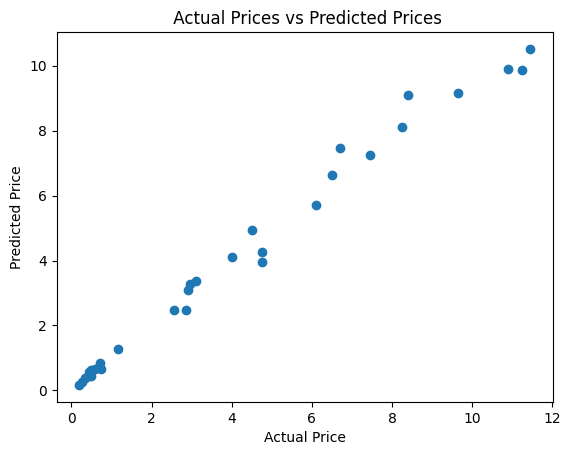

In [35]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Validation Data Testing our model on training data

In [36]:
Y_pred=regressor.predict(X_train)

In [37]:
print("Random Forest")
r_square = metrics.r2_score(Y_train, Y_pred)
print("R squared : ", r_square)

Random Forest
R squared :  0.9880075820226729


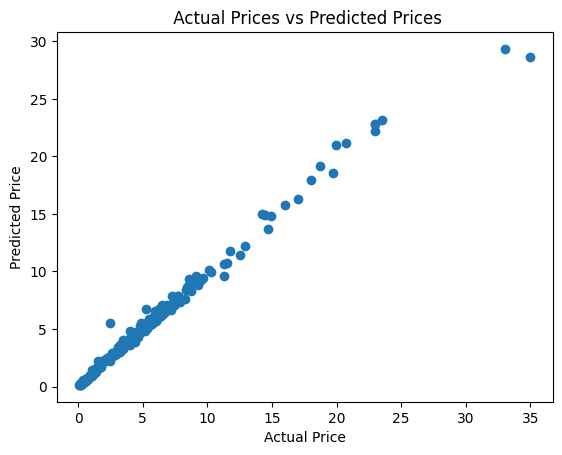

In [38]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()